In [72]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.utilities import lambdify
from scipy.constants import h

sp.init_printing()

x = sp.Symbol('x', real=True)
k = sp.Symbol('k', real=True, positive=True)
a = sp.Symbol('a', real=True)
m = sp.Symbol('m', real=True, positive=True)
t = sp.Symbol('t', real=True, positive=True)
hbar = sp.Symbol('hbar', real=True, positive=True)
n = sp.Symbol('n', integer=True, nonzero=True)
psi = sp.Function('psi')

x, k, a, m, t, hbar, n, psi(x)

$$\frac{d^2\psi(x)}{dx^2} = -k^2\psi(x)$$

In [73]:
eq = sp.Eq(psi(x).diff(x, x), -k**2 * psi(x))
sol = sp.dsolve(eq, psi(x), ics={psi(0): 0})


In [74]:
sol = sol.subs(k, n * sp.pi / a)
sol


In [75]:
sol = sol.subs(sp.Symbol('C1'), sp.sqrt(2 / a))
sol

$$<p>=?$$
$$<p^2>=?$$
$$\sigma_P^2=?$$

$$\sigma_X \sigma_P \geq \frac{\hbar}{2}$$

Spradzić, czy ta zasada nieoznaczoności jest faktycznie dla tej studni potencjału spełniona.

Aby zweryfikować spełnienie zasady nieoznaczoności dla studni potencjału, potrzebujemy obliczyć wartości oczekiwane i wariancje operatorów pędu i położenia w funkcji falowej studni. Następnie, korzystając z nierówności Heisenberga, możemy ocenić, czy zasada nieoznaczoności jest spełniona.


Aby obliczyć odchylenie standardowe, będziemy potrzebować wartości oczekiwanej operatora położenia oraz wartości oczekiwanej kwadratu operatora położenia. Korzystając z tych wartości, będziemy mogli obliczyć wariancję, a po spierwiastkowaniu jej otrzymamy żądane odchylenie standardowe.

In [76]:
EX = sp.integrate(sol.rhs * x * sol.rhs, (x, 0, a)).simplify()
EX

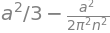

In [77]:
EX2 = sp.integrate(sol.rhs * x**2 * sol.rhs, (x, 0, a)).simplify()
EX2

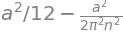

In [78]:
VarX = EX2 - EX**2
VarX

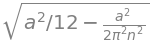

In [79]:
devX = sp.sqrt(VarX)
devX

To samo robimy dla operatora pędu.

In [80]:
EP = sp.integrate(sol.rhs * (-hbar*sp.I) * sol.rhs.diff(x), (x, 0, a)).simplify()
EP

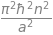

In [81]:
EP2 = sp.integrate(sol.rhs * (sol.rhs).diff(x,x) * (-hbar**2), (x, 0, a)).simplify()

EP2

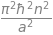

In [82]:
VarP = EP2 - EP**2
VarP

In [83]:
devP = sp.sqrt(VarP)
devP

Żeby sprawdzić czy nierówność Heisenberga jest spełniona, należy sprawdzić czy iloczyn odchyleń standardowych operatora położenia i pędu jest większy lub równy od połowy stałej redukcyjnej Plancka

$$\sigma_X \sigma_P \geq \frac{\hbar}{2}$$

In [84]:
wzor=devX*devP
wzor.simplify()

Sprawdzamy czy zasada nieoznaczoności jest spełniona dla najmniejszego n=1:

In [87]:
lewa = h*sp.sqrt(3*sp.pi**2-18)/6
prawa = h/2
prawa

In [88]:
lewa.evalf()

In [91]:
if(lewa.evalf()>prawa):
    print("Zasada nieoznaczoności jest spełniona")
else:
    print("Zasada nieoznaczoności nie jest spełniona")

Zasada nieoznaczoności jest spełniona
